# OSEMN Exercises

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

1\. Create a random list of number and then save it to a text file named "simple_data.txt"

In [4]:
liste = np.random.randint(10,size=50)
myfile = open("simple_data.txt","w+")
myfile.write(str(liste))
myfile.close()

2\. Create a random matrix of 5x5 and then save it to a text file named "data.txt"

In [5]:
matrix = np.random.randint(10,size=(5,5))
myfile = open("data.txt","w+")
myfile.write(str(matrix))
myfile.close()


3\. Load the saved txt file of point 2 and convert it to a csv file (by hand)

In [33]:
import csv

mycsv = open("data.csv","w",newline='')
filewriter = csv.writer(mycsv, delimiter=',')
            
myfile = open("data.txt","r")
for line in myfile:
    #line is a str
    myline = line[2:-2] #remove "[","]" and space from beginning and endng line
    elts = myline.split(" ")
    filewriter.writerow(elts)
mycsv.close()   
myfile.close()

4\. load the binary file named *credit_card.dat* and convert the data into the real credit-card number. 
Each line correspond to a credit card number.
Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [58]:
mydat = open("credit_card.dat","rb") #b is for binary
file_content = mydat.read()
word_counter = 0
word_size=6 # a carac is 6 bytes
word = ""
card_counter = 0
for i in range(0,len(file_content), word_size):
    nb = int(file_content[i:i+6],2)
    word+=chr(nb)
    word_counter+=1
    #want to work only on the first line to verify everything
    if(word_counter%20==0):
        print(word)
        card_counter+=1
print(card_counter)
mydat.close()

7648 5673 3775 2271

7648 5673 3775 2271
3257 8247 3354 2266

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1

5\. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.

In [67]:
import json
import csv

data = json.load(open('user_data.json'))

mycsv = open("user_data.csv","w",newline='')
filewriter = csv.writer(mycsv, delimiter=',')
filewriter.writerow(data[0]) #name of rows

for i in range(0,len(data)):
    if(data[i]['CreditCardType']=='American Express'):
        newRow=[]
        for j in data[i]:
            newRow.append(data[i][j])
        filewriter.writerow(newRow)
mycsv.close()

6\. Load the file from this url: [https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1](https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1) with Pandas. 
+ Explore the data (see the info of the data)
+ Draw the histogram of the 'class' field. Describe what you see


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026787A0CDC8>]],
      dtype=object)

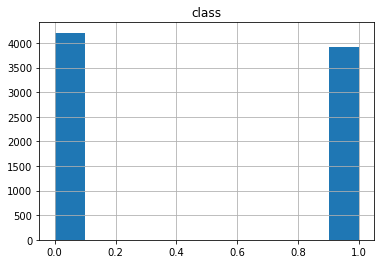

In [92]:
import pandas as pd
%matplotlib inline 

file_name="https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
data=pd.read_csv(file_name,nrows=8125)
data.head()

data.hist('class')


7\. Load the remote file [https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1](https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1) with Pandas and plot a scatter plot all possible combination of the following fields:
    
  + features_1
  + features_2
  + features_3

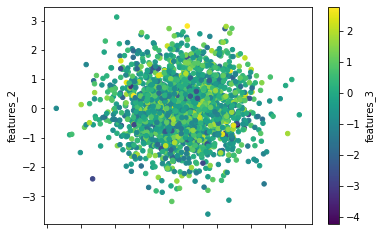

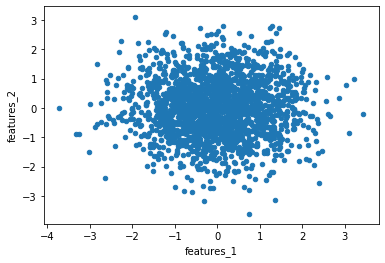

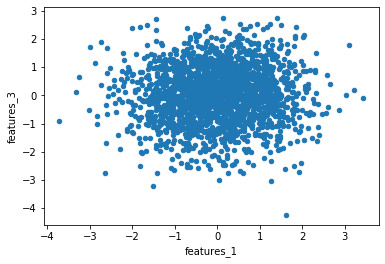

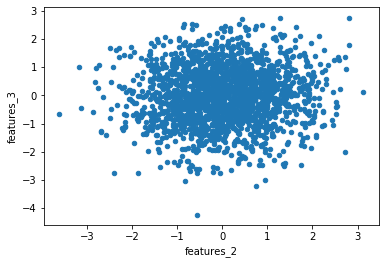

In [89]:
file_name="https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1"
data=pd.read_csv(file_name,nrows=8125)
data.head()
data.plot.scatter(x='features_1',y='features_2',c='features_3',colormap='viridis')
data.plot.scatter(x='features_1',y='features_2')
data.plot.scatter(x='features_1',y='features_3')
data.plot.scatter(x='features_2',y='features_3')

8\. Load the same file of point 6, and convert the file to json with Pandas.

In [91]:
file_name="https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1"
data=pd.read_csv(file_name,nrows=8125)

data.to_json("mushroom.json", orient = "records")